In [1]:
--> Creer fonction distance pour Kmeans

SyntaxError: invalid syntax (<ipython-input-1-1155b439981f>, line 1)

In [3]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials # To access authorised Spotify data


CLIENT_ID = 'ed490024ea5f4072810146d4d3dff356'
CLIENT_SECRET = 'b74fa8fd014f4932bb15e79572a104fe'

PLAYLIST_ID = '37i9dQZF1DWYJ5kmTbkZiz' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'time_signature', 'track_href', 'type', 'uri', 'mode', 'duration_ms']
features_df = pd.DataFrame(features).drop(cols_to_drop, axis=1)

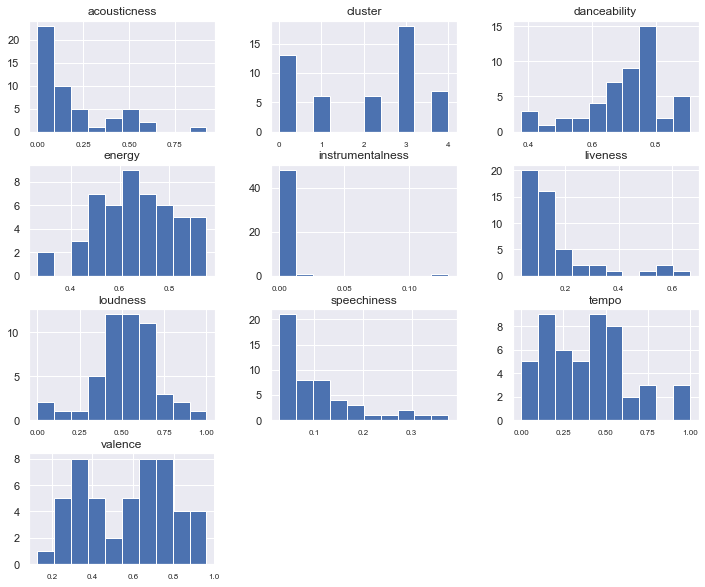

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
features_df.hist(xlabelsize=8, figsize=(12,10))
plt.show()

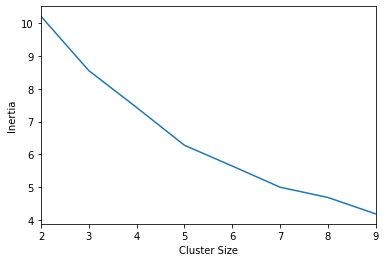

In [5]:
from sklearn.cluster import KMeans

# Scaling
for col in ['loudness', 'tempo']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))

# Determining the cluster size
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

# Visualization of different cluster size performations
pd.DataFrame(score_list, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

# Training and Predicting
kmeans_model = KMeans(n_clusters=5, random_state=3).fit(features_df)
preds = kmeans_model.predict(features_df)

In [6]:
# Extracting song and artist names
songs = [x['track']['name'] for x in tracks['items']]
artists = [x['track']['artists'] for x in tracks['items']]

# Concatenating multiple artist names
artist_list = []
for group in artists:
    artist_group = []
    for person in group:
        artist_group.append(person['name'])
    artist_list.append(', '.join(artist_group))

# Adding predictions to dataframe
features_df['cluster'] = preds

# Grouping clusters to see the averages
clusters = features_df \
    .groupby('cluster') \
    .agg('mean')

In [7]:
clusters.round(3).style.background_gradient(cmap='RdYlGn')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.717,0.632,0.511,0.077,0.062,0,0.291,0.347,0.4
1,0.784,0.618,0.691,0.102,0.465,0.001,0.131,0.708,0.152
2,0.585,0.806,0.619,0.144,0.142,0.001,0.09,0.774,0.849
3,0.714,0.74,0.563,0.102,0.073,0.001,0.132,0.684,0.331
4,0.673,0.444,0.265,0.146,0.527,0.019,0.1,0.422,0.385


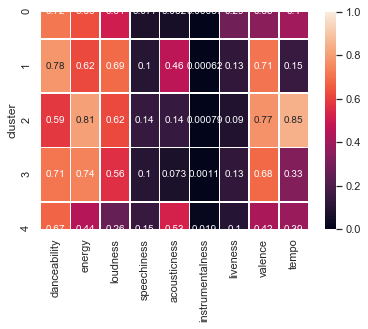

In [8]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns;sns.set()
%matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(clusters, annot=True,vmin=0, vmax=1, linewidths=.5)

In [9]:
clusters.style.background_gradient(cmap='Blues')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.717,0.632308,0.511304,0.0770154,0.061534,0.000367025,0.291062,0.346769,0.400132
1,0.784,0.618333,0.690691,0.101667,0.464833,0.00062,0.130767,0.708167,0.151999
2,0.585333,0.806,0.619113,0.1441,0.142017,0.000789433,0.0895,0.773833,0.849156
3,0.713611,0.740111,0.563268,0.102283,0.0725489,0.00114134,0.131506,0.683833,0.33128
4,0.673429,0.443714,0.264962,0.146,0.527143,0.018588,0.0998429,0.422,0.385332


In [53]:
gettrackFeatures = pd.read_csv('my_data/gettrackFeatures.csv')

In [54]:
cols_to_drop = ['mode', 'duration_ms', 'key','Unnamed: 0']
my_features_df = gettrackFeatures.drop(cols_to_drop, axis=1)

In [55]:
my_features_df=my_features_df[my_features_df['trackID']!='0']
my_features_df

,trackID,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,5ayybTSXNwcarDtxQKqvWX,0.474,0.338,-11.528,0.0299,0.6480,0.000000,0.1300,0.810,154.596
1,0NEMfVkEjxSVjnG0sJms8v,0.267,0.481,-6.708,0.0378,0.2840,0.972000,0.1920,0.221,195.041
2,5LjSxAIKwyZvQqJ04ZQ0Da,0.480,0.628,-7.643,0.0262,0.1740,0.000033,0.0753,0.541,143.412
3,2jv9Ppwz9u3lqWfXV0q2sW,0.463,0.524,-8.207,0.0316,0.0260,0.000000,0.1020,0.308,144.055
4,6pymOcrCnMuCWdgGVTvUgP,0.697,0.709,-1.917,0.0455,0.0452,0.000000,0.1380,0.787,134.910
...,...,...,...,...,...,...,...,...,...,...
28470,1Mg13VMaQj4fhPtQT41vUZ,0.817,0.625,-3.643,0.0719,0.0508,0.001230,0.0580,0.759,102.907
28471,3AiNYdRmhXcv7KCFHZOddA,0.625,0.966,-3.908,0.0668,0.6090,0.000089,0.0667,0.929,170.194
28472,5w0dh39SYz1ei2tCs7X7Fo,0.685,0.760,-9.354,0.0430,0.4300,0.000000,0.0704,0.895,113.569
28473,3GVkPk8mqxz0itaAriG1L7,0.734,0.570,-7.066,0.1330,0.8470,0.000021,0.1120,0.689,129.953


In [56]:
without_duplicate=my_features_df['trackID'].drop_duplicates().index
my_features_df = my_features_df.loc[without_duplicate]
my_features_df = my_features_df.reset_index()
trackID = my_features_df['trackID']
features_df=my_features_df.drop(['index','trackID'], axis=1)
features_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.474,0.338,-11.528,0.0299,0.6480,0.000000,0.1300,0.810,154.596
1,0.267,0.481,-6.708,0.0378,0.2840,0.972000,0.1920,0.221,195.041
2,0.480,0.628,-7.643,0.0262,0.1740,0.000033,0.0753,0.541,143.412
3,0.463,0.524,-8.207,0.0316,0.0260,0.000000,0.1020,0.308,144.055
4,0.697,0.709,-1.917,0.0455,0.0452,0.000000,0.1380,0.787,134.910
...,...,...,...,...,...,...,...,...,...
22836,0.649,0.851,-6.108,0.0434,0.0128,0.011500,0.1990,0.639,122.088
22837,0.456,0.893,-9.830,0.1050,0.3500,0.005280,0.2000,0.755,183.290
22838,0.817,0.625,-3.643,0.0719,0.0508,0.001230,0.0580,0.759,102.907
22839,0.625,0.966,-3.908,0.0668,0.6090,0.000089,0.0667,0.929,170.194


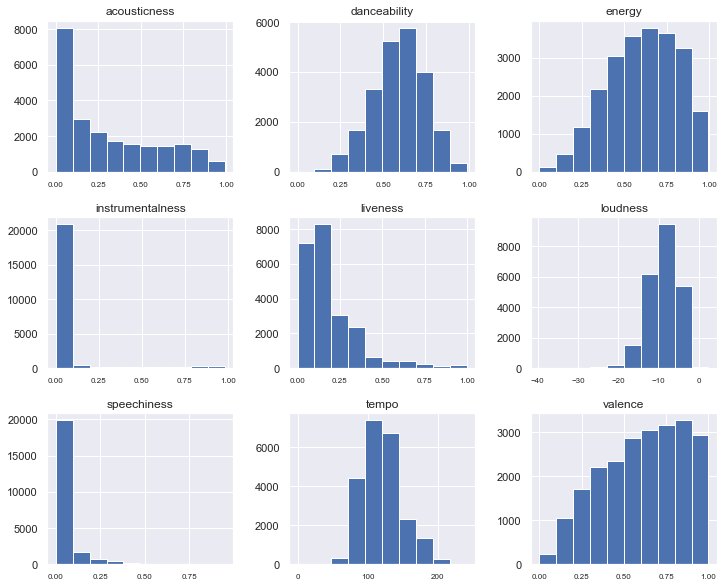

In [57]:
features_df.hist(xlabelsize=8, figsize=(12,10))
plt.show()

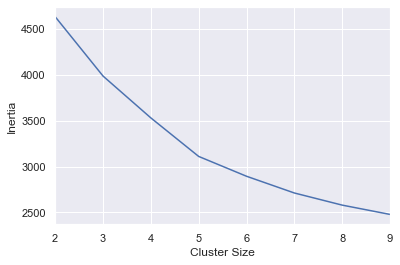

In [58]:
# Scaling
for col in ['loudness', 'tempo']:
    features_df[col] = ((features_df[col] - features_df[col].min()) / (features_df[col].max() - features_df[col].min()))

# Determining the cluster size
score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(features_df)
    preds = kmeans_model.predict(features_df)
    score_list.append(kmeans_model.inertia_)

# Visualization of different cluster size performations
pd.DataFrame(score_list, index=range(2, 10)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

# Training and Predicting
kmeans_model = KMeans(n_clusters=5, random_state=3).fit(features_df)
preds = kmeans_model.predict(features_df)

In [59]:
# Adding predictions to dataframe
features_df['cluster'] = preds

# Grouping clusters to see the averages
clusters = features_df \
    .groupby('cluster') \
    .agg('mean')

In [60]:
clusters.round(3).style.background_gradient(cmap='RdYlGn')

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.617,0.592,0.686,0.053,0.279,0.774,0.172,0.615,0.508
1,0.667,0.732,0.753,0.071,0.11,0.016,0.184,0.788,0.505
2,0.456,0.335,0.659,0.042,0.709,0.023,0.18,0.364,0.465
3,0.608,0.577,0.712,0.062,0.577,0.011,0.226,0.777,0.503
4,0.555,0.643,0.762,0.072,0.128,0.011,0.188,0.395,0.511


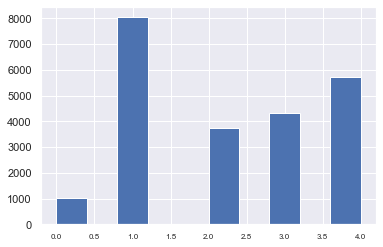

In [64]:
features_df['cluster'].hist(xlabelsize=8, figsize=(6,4))
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [ ]:
songs_df = pd.read_csv('my_data/songs_billboard.csv')
songs_df.head()

In [ ]:
XX=songs_df[['comboWeek','comboInstance']]
XX=XX.to_numpy()

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(XX)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=0)
pred_y = kmeans.fit_predict(XX)
plt.scatter(XX[:,0], XX[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()